In [1]:
import pandas as pd
Areas = pd.read_excel('LocalAreas.xlsx')

In [3]:
Areas.head()

,AREANM,AREACD,1998,1999,2000,2001,2002,2003,2004,2005,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Hartlepool,E06000001,10122.0,10715.0,10923.0,11002.0,11631.0,12266.0,12752.0,13225.0,...,15284.0,15773.0,15623.0,16410.0,17653.0,17886.0,17645.0,18060.0,17697.0,18386.0
1,Stockton-on-Tees,E06000004,15918.0,16528.0,16878.0,17028.0,17824.0,19058.0,20456.0,21031.0,...,24635.0,25416.0,26129.0,27592.0,27881.0,27520.0,27997.0,29482.0,28116.0,30830.0
2,Middlesbrough,E06000002,11798.0,12403.0,12826.0,13049.0,13679.0,14621.0,15788.0,16832.0,...,19841.0,19756.0,20418.0,21277.0,22048.0,22795.0,24226.0,24217.0,21990.0,24405.0
3,Redcar and Cleveland,E06000003,10382.0,10643.0,10963.0,10840.0,11208.0,12309.0,12535.0,12890.0,...,15161.0,15281.0,15767.0,16290.0,15860.0,14899.0,15526.0,16220.0,15806.0,16626.0
4,Darlington,E06000005,16872.0,17534.0,18892.0,20021.0,21192.0,22464.0,23854.0,23548.0,...,24085.0,24282.0,26905.0,28479.0,27195.0,27086.0,27007.0,26760.0,24491.0,25783.0


In [4]:
print("Missing values for each column:")
print(Areas.isnull().sum())

Missing values for each column:
AREANM    1
AREACD    1
1998      1
1999      1
2000      1
2001      1
2002      1
2003      1
2004      1
2005      1
2006      1
2007      1
2008      1
2009      1
2010      1
2011      1
2012      1
2013      1
2014      1
2015      1
2016      1
2017      1
2018      1
2019      1
2020      1
2021      1
dtype: int64


In [6]:
print(Areas.dtypes)

AREANM     object
AREACD     object
1998      float64
1999      float64
2000      float64
2001      float64
2002      float64
2003      float64
2004      float64
2005      float64
2006      float64
2007      float64
2008      float64
2009      float64
2010      float64
2011      float64
2012      float64
2013      float64
2014      float64
2015      float64
2016      float64
2017      float64
2018      float64
2019      float64
2020      float64
2021      float64
dtype: object


In [7]:
print(Areas.duplicated().sum())

0


In [8]:
#Data cleaning
numeric_columns = Areas.select_dtypes(include=['number']).columns

In [9]:
Areas[numeric_columns] = Areas[numeric_columns].fillna(Areas[numeric_columns].mean())

In [10]:
print("Missing values after cleaning:")
print(Areas.isnull().sum())

Missing values after cleaning:
AREANM    1
AREACD    1
1998      0
1999      0
2000      0
2001      0
2002      0
2003      0
2004      0
2005      0
2006      0
2007      0
2008      0
2009      0
2010      0
2011      0
2012      0
2013      0
2014      0
2015      0
2016      0
2017      0
2018      0
2019      0
2020      0
2021      0
dtype: int64


In [16]:
if 'AREACD' in Areas.columns:
    Areas.drop('AREACD', axis=1, inplace=True)

if 'AREANM' in Areas.columns:
    Areas['AREANM'].fillna('Unknown', inplace=True)

clean = Areas.isnull().sum()

clean

AREANM    0
1998      0
1999      0
2000      0
2001      0
2002      0
2003      0
2004      0
2005      0
2006      0
2007      0
2008      0
2009      0
2010      0
2011      0
2012      0
2013      0
2014      0
2015      0
2016      0
2017      0
2018      0
2019      0
2020      0
2021      0
dtype: int64

In [24]:
cornwall_and_devon = [
    "Cornwall", "Isles of Scilly", "Plymouth", "Torbay", "East Devon",
    "Exeter", "Mid Devon", "North Devon", "South Hams", "Teignbridge",
    "Torridge", "West Devon"
]

Areas_focus = Areas[Areas['AREANM'].isin(cornwall_and_devon)]

mean_gdp_per_head = Areas_focus.mean(axis=0)

print(mean_gdp_per_head)

1998    13582.916667
1999    14104.500000
2000    14410.166667
2001    14808.416667
2002    15542.416667
2003    16517.166667
2004    17565.916667
2005    18133.750000
2006    19157.333333
2007    19183.416667
2008    19689.500000
2009    19182.833333
2010    19974.833333
2011    20533.916667
2012    20846.583333
2013    21559.833333
2014    22015.166667
2015    22642.583333
2016    23223.333333
2017    24325.583333
2018    24739.416667
2019    25189.333333
2020    22601.333333
2021    24521.750000
dtype: float64


/tmp/ipykernel_150/2988794482.py:13: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_gdp_per_head = Areas_focus.mean(axis=0)


In [26]:
mean_gdp_per_head = Areas_focus.mean(axis=0, numeric_only=True)
print(mean_gdp_per_head)

1998    13582.916667
1999    14104.500000
2000    14410.166667
2001    14808.416667
2002    15542.416667
2003    16517.166667
2004    17565.916667
2005    18133.750000
2006    19157.333333
2007    19183.416667
2008    19689.500000
2009    19182.833333
2010    19974.833333
2011    20533.916667
2012    20846.583333
2013    21559.833333
2014    22015.166667
2015    22642.583333
2016    23223.333333
2017    24325.583333
2018    24739.416667
2019    25189.333333
2020    22601.333333
2021    24521.750000
dtype: float64


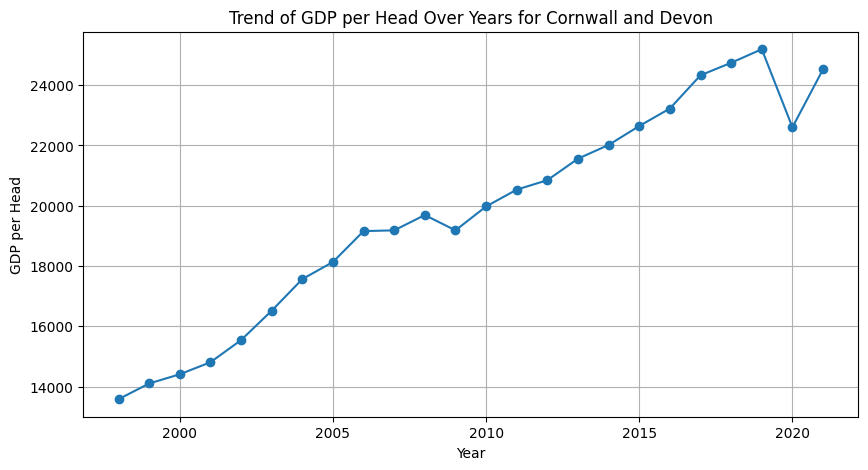

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
mean_gdp_per_head.plot(kind='line', marker='o')  
plt.title('Trend of GDP per Head Over Years for Cornwall and Devon')
plt.xlabel('Year')
plt.ylabel('GDP per Head')
plt.grid(True)
plt.show()

In [31]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 8))
Areas_focus['2021'].plot(kind='pie', autopct='%1.1f%%')  # Assuming '2021' is the correct column name
plt.title('Distribution of GDP per Head in Cornwall and Devon for 2021')
plt.ylabel('')  
plt.show()



KeyError: '2021'

<Figure size 800x800 with 0 Axes>

In [32]:
print(Areas_focus.columns)

Index(['AREANM',     1998,     1999,     2000,     2001,     2002,     2003,
           2004,     2005,     2006,     2007,     2008,     2009,     2010,
           2011,     2012,     2013,     2014,     2015,     2016,     2017,
           2018,     2019,     2020,     2021],
      dtype='object')


Text(0, 0.5, '')

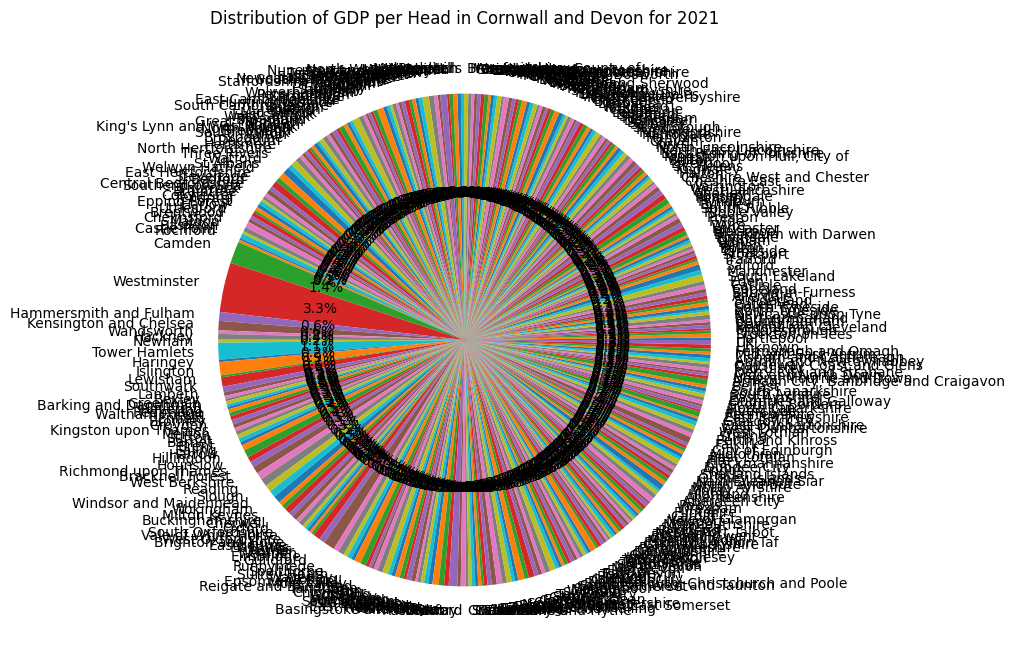

In [37]:
plt.figure(figsize=(8, 8))
Areas[2021].plot(kind='pie', autopct='%1.1f%%')  
plt.title('Distribution of GDP per Head in Cornwall and Devon for 2021')
plt.ylabel('')

In [36]:
Areas.columns

Index([1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
      dtype='object')

KeyError: '2021'